In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("finalTrain.csv")

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [6]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [7]:
from datetime import datetime

def not_time(col):
    li = df[col].value_counts().index
    not_time_list = []

    # Define the format string that corresponds to your time format
    format_str = '%H:%M'

    # Loop over each value in the dataset
    for i in li:
        try:
            # Try to parse the value as a time using datetime.strptime()
            datetime.strptime(i, format_str)        
        except ValueError:
            not_time_list.append(i)
            
    for time in not_time_list:
        df[col].replace(time, np.nan, inplace=True)
    return not_time_list

In [8]:
def strip_time(col):
    le = col.split(":")
    if len(le) == 3:
        return f"{le[0]}:{le[1]}"
    else:
        return col

<Axes: xlabel='Delivery_person_Age', ylabel='Density'>

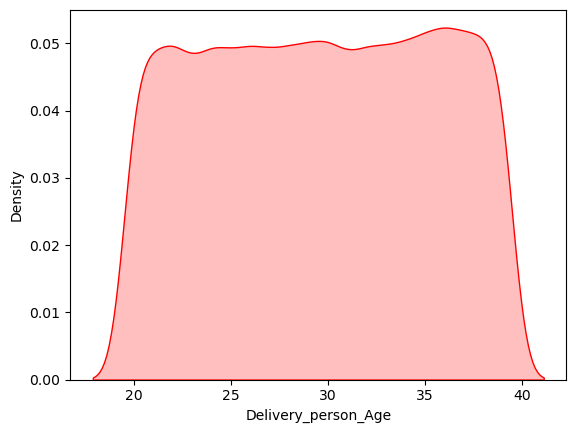

In [20]:
sns.kdeplot(df["Delivery_person_Age"], fill=True, color="r")

<Axes: xlabel='Delivery_person_Ratings', ylabel='Density'>

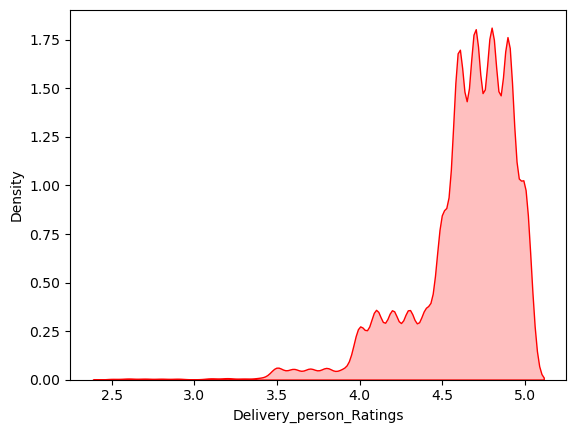

In [21]:
sns.kdeplot(df["Delivery_person_Ratings"], fill=True, color="r")

<Axes: xlabel='multiple_deliveries', ylabel='Density'>

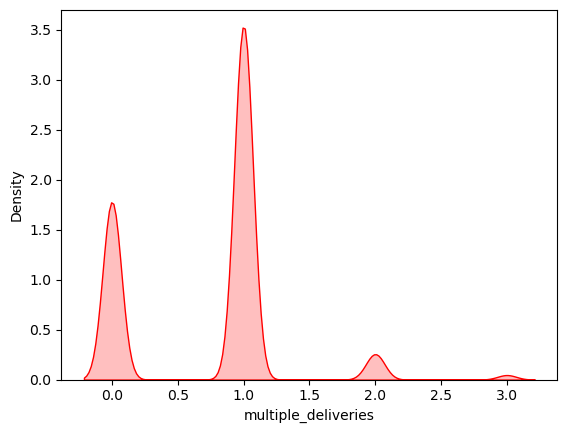

In [22]:
sns.kdeplot(df["multiple_deliveries"], fill=True, color="r")

In [9]:
df["Time_Order_picked"] = df["Time_Order_picked"].apply(strip_time)

In [10]:
not_time("Time_Order_picked")
not_time("Time_Orderd")

['0.833333333',
 '1',
 '0.791666667',
 '0.958333333',
 '0.875',
 '0.916666667',
 '0.75',
 '0.416666667',
 '0.458333333',
 '0.5',
 '0.375',
 '0.625',
 '0.541666667',
 '0.583333333',
 '0.708333333',
 '0.666666667']

In [12]:
df.dropna(subset=["Time_Orderd", "Time_Order_picked"], axis=0, inplace=True)

In [13]:
time_cols = ["Time_Orderd", "Time_Order_picked"]

In [14]:
for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='%H:%M')

In [15]:
df["diff"]=df["Time_Order_picked"]-df["Time_Orderd"]

In [16]:
df["diff"] = df["diff"].astype('timedelta64[m]')

In [18]:
df["month"] = pd.to_datetime(df["Order_Date"], format='%d-%m-%Y').dt.month

In [19]:
df.groupby("month").agg({"Time_taken (min)": "mean"})

,Time_taken (min)
month,
2,26.578507
3,26.328845
4,26.156256


/var/folders/0x/fr5n585d50j8t9x54rbwy91w0000gn/T/ipykernel_6610/157087076.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

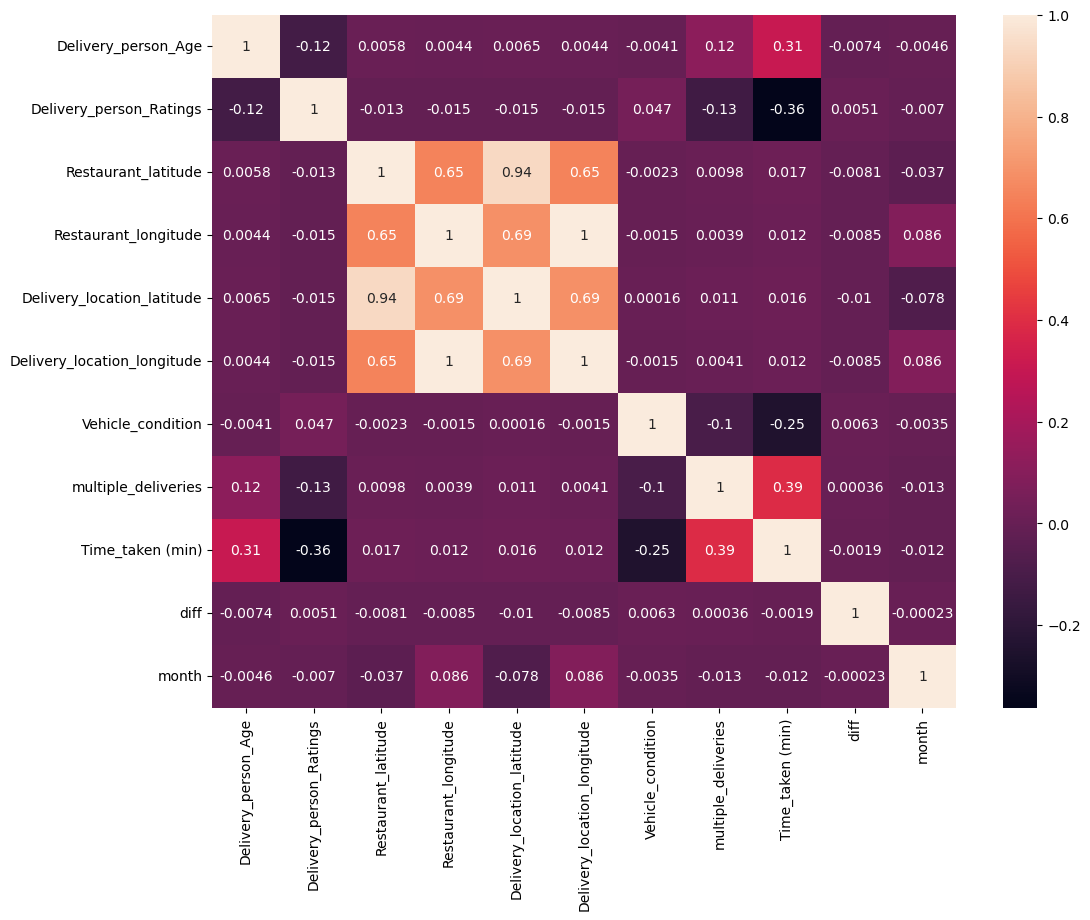

In [23]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True)

In [24]:
df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].median(), inplace=True)

In [25]:
df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].mean(), inplace=True) #median

In [26]:
df["multiple_deliveries"] = df["multiple_deliveries"].fillna(df["multiple_deliveries"].mode()[0]) #0
df["Road_traffic_density"] = df["Road_traffic_density"].fillna("Medium")#MEDIUM
df["Weather_conditions"] = df["Weather_conditions"].fillna("Unknown")

In [27]:
df["lat"] = df["Delivery_location_latitude"]-df["Restaurant_latitude"]
df["long"] = df["Delivery_location_longitude"]-df["Restaurant_longitude"]

In [28]:
cat_cols = ['Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City']

In [29]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [30]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
diff                           0
month                          0
lat                            0
long                           0
dtype: int64

In [31]:
df.shape

(35407, 24)

In [32]:
df["Delivery_person_ID"]

0           DEHRES17DEL01
1           KOCRES16DEL01
2          PUNERES13DEL03
3          LUDHRES15DEL02
4           KNPRES14DEL02
               ...       
45578    RANCHIRES16DEL01
45579       JAPRES04DEL01
45580       AGRRES16DEL01
45582     COIMBRES11DEL01
45583    RANCHIRES09DEL02
Name: Delivery_person_ID, Length: 35407, dtype: object

In [33]:
df_delivery_person_id = df.groupby("Delivery_person_ID").agg({"Time_taken (min)": "median"})

In [34]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),diff,month,lat,long
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,1900-01-01 21:55:00,...,Snack,motorcycle,3.0,No,Metropolitian,46,15.0,2,0.07,0.07
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,1900-01-01 14:55:00,...,Meal,motorcycle,1.0,No,Metropolitian,23,10.0,2,0.04,0.04
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,1900-01-01 17:30:00,...,Drinks,scooter,1.0,No,Metropolitian,21,10.0,3,0.09,0.09
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,1900-01-01 09:20:00,...,Buffet,motorcycle,0.0,No,Metropolitian,20,10.0,2,0.02,0.02
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,1900-01-01 19:50:00,...,Snack,scooter,1.0,No,Metropolitian,41,15.0,2,0.13,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45578,0x1178,RANCHIRES16DEL01,35.0,4.2,23.371292,85.327872,23.481292,85.437872,08-03-2022,1900-01-01 21:45:00,...,Drinks,motorcycle,1.0,No,Metropolitian,33,10.0,3,0.11,0.11
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,1900-01-01 11:35:00,...,Meal,motorcycle,0.0,No,Metropolitian,32,10.0,3,0.01,0.01
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,1900-01-01 19:55:00,...,Buffet,motorcycle,1.0,No,Metropolitian,36,15.0,2,0.07,0.07
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,1900-01-01 13:35:00,...,Snack,motorcycle,1.0,No,Metropolitian,26,5.0,3,0.04,0.04


In [35]:
delivery_person_id = df_delivery_person_id.to_dict()

In [36]:
df["Delivery_person_ID"] = df["Delivery_person_ID"].map(delivery_person_id["Time_taken (min)"])

In [37]:
Weather_conditions = pd.get_dummies(df["Weather_conditions"])
df = pd.concat([Weather_conditions, df], axis=1)

Festival = pd.get_dummies(df["Festival"])
df = pd.concat([Festival, df], axis=1)

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [39]:
X = df.drop(["Time_taken (min)", "ID", "Time_Orderd", "Time_Order_picked", "Order_Date", "Weather_conditions", "Festival", "Delivery_location_latitude", "Delivery_location_longitude", ], axis=1)
y = df["Time_taken (min)"]

/var/folders/0x/fr5n585d50j8t9x54rbwy91w0000gn/T/ipykernel_6610/3529246989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

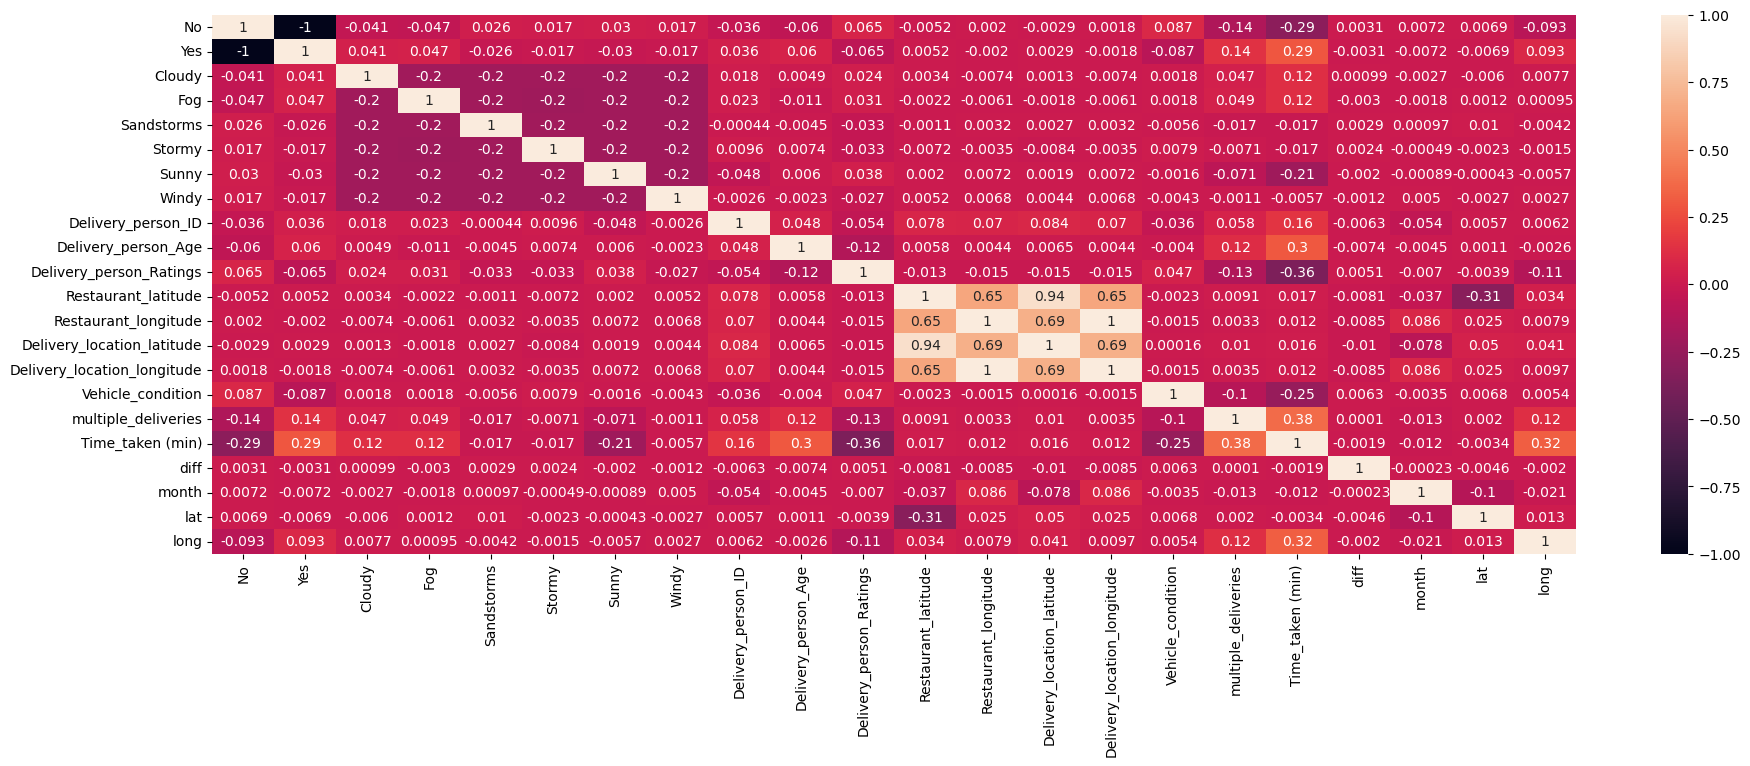

In [40]:
plt.figure(figsize=(22, 7))
sns.heatmap(df.corr(), annot=True)

In [41]:
df.columns

Index(['No', 'Yes', 'Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy',
       'ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)', 'diff',
       'month', 'lat', 'long'],
      dtype='object')

In [42]:
X["City"] = X["City"].map({"Metropolitian": 3, "Urban": 1, "Semi-Urban": 2})

In [43]:
X["Type_of_vehicle"] = X["Type_of_vehicle"].map({"bicycle": 1, "electric_scooter": 2, "scooter": 3, "motorcycle": 4})

In [44]:
X["Type_of_order"] = X["Type_of_order"].map({"Drinks": 1, "Snack": 2, "Meal": 3, "Buffet": 4})

In [45]:
X["Road_traffic_density"] = X["Road_traffic_density"].map({"Low": 1, "Medium": 2, "High": 3, "Jam": 4})

In [46]:
X.isna().sum()

No                         0
Yes                        0
Cloudy                     0
Fog                        0
Sandstorms                 0
Stormy                     0
Sunny                      0
Windy                      0
Delivery_person_ID         0
Delivery_person_Age        0
Delivery_person_Ratings    0
Restaurant_latitude        0
Restaurant_longitude       0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
City                       0
diff                       0
month                      0
lat                        0
long                       0
dtype: int64

In [47]:
X

,No,Yes,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy,Delivery_person_ID,Delivery_person_Age,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,diff,month,lat,long
0,1,0,0,1,0,0,0,0,17.0,36.0,...,4,2,2,4,3.0,3,15.0,2,0.07,0.07
1,1,0,0,0,0,1,0,0,30.0,21.0,...,3,1,3,4,1.0,3,10.0,2,0.04,0.04
2,1,0,0,0,1,0,0,0,27.0,23.0,...,2,1,1,3,1.0,3,10.0,3,0.09,0.09
3,1,0,0,0,1,0,0,0,20.0,34.0,...,1,0,4,4,0.0,3,10.0,2,0.02,0.02
4,1,0,0,1,0,0,0,0,24.0,24.0,...,4,1,2,3,1.0,3,15.0,2,0.13,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45578,1,0,0,0,0,0,0,1,30.0,35.0,...,4,2,1,4,1.0,3,10.0,3,0.11,0.11
45579,1,0,0,0,0,0,0,1,24.0,30.0,...,3,1,3,4,0.0,3,10.0,3,0.01,0.01
45580,1,0,0,0,0,0,0,1,27.0,21.0,...,4,0,4,4,1.0,3,15.0,2,0.07,0.07
45582,1,0,1,0,0,0,0,0,28.0,20.0,...,3,0,2,4,1.0,3,5.0,3,0.04,0.04


In [48]:
X

,No,Yes,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy,Delivery_person_ID,Delivery_person_Age,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,diff,month,lat,long
0,1,0,0,1,0,0,0,0,17.0,36.0,...,4,2,2,4,3.0,3,15.0,2,0.07,0.07
1,1,0,0,0,0,1,0,0,30.0,21.0,...,3,1,3,4,1.0,3,10.0,2,0.04,0.04
2,1,0,0,0,1,0,0,0,27.0,23.0,...,2,1,1,3,1.0,3,10.0,3,0.09,0.09
3,1,0,0,0,1,0,0,0,20.0,34.0,...,1,0,4,4,0.0,3,10.0,2,0.02,0.02
4,1,0,0,1,0,0,0,0,24.0,24.0,...,4,1,2,3,1.0,3,15.0,2,0.13,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45578,1,0,0,0,0,0,0,1,30.0,35.0,...,4,2,1,4,1.0,3,10.0,3,0.11,0.11
45579,1,0,0,0,0,0,0,1,24.0,30.0,...,3,1,3,4,0.0,3,10.0,3,0.01,0.01
45580,1,0,0,0,0,0,0,1,27.0,21.0,...,4,0,4,4,1.0,3,15.0,2,0.07,0.07
45582,1,0,1,0,0,0,0,0,28.0,20.0,...,3,0,2,4,1.0,3,5.0,3,0.04,0.04


In [49]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression().fit(X_train, y_train)

In [53]:
y_pred = model.predict(X_test)
train = model.predict(X_train)

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_test, y_pred)
# r2_score(y_train, train)

0.5796614854417705

In [56]:
from sklearn.ensemble import ExtraTreesRegressor

In [57]:
pd.DataFrame(X)

,No,Yes,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy,Delivery_person_ID,Delivery_person_Age,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,City,diff,month,lat,long
0,1,0,0,1,0,0,0,0,17.0,36.0,...,4,2,2,4,3.0,3,15.0,2,0.07,0.07
1,1,0,0,0,0,1,0,0,30.0,21.0,...,3,1,3,4,1.0,3,10.0,2,0.04,0.04
2,1,0,0,0,1,0,0,0,27.0,23.0,...,2,1,1,3,1.0,3,10.0,3,0.09,0.09
3,1,0,0,0,1,0,0,0,20.0,34.0,...,1,0,4,4,0.0,3,10.0,2,0.02,0.02
4,1,0,0,1,0,0,0,0,24.0,24.0,...,4,1,2,3,1.0,3,15.0,2,0.13,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45578,1,0,0,0,0,0,0,1,30.0,35.0,...,4,2,1,4,1.0,3,10.0,3,0.11,0.11
45579,1,0,0,0,0,0,0,1,24.0,30.0,...,3,1,3,4,0.0,3,10.0,3,0.01,0.01
45580,1,0,0,0,0,0,0,1,27.0,21.0,...,4,0,4,4,1.0,3,15.0,2,0.07,0.07
45582,1,0,1,0,0,0,0,0,28.0,20.0,...,3,0,2,4,1.0,3,5.0,3,0.04,0.04


In [58]:
model = ExtraTreesRegressor(n_jobs=1, random_state=21).fit(X_train, y_train)
y_pred = model.predict(X_test)
train = model.predict(X_train)
print(r2_score(y_train, train))
print(r2_score(y_test, y_pred))

1.0
0.8287334914517235


In [60]:
from sklearn.model_selection import cross_val_score
import statistics

scores = cross_val_score(model, X, y, cv=30)
mean_score = np.mean(scores)
std_dev = statistics.stdev(scores)


print("Cross-validation score: {}".format(mean_score))
print("Cross-validation std dev: {}".format(std_dev))

print(scores)

Cross-validation score: 0.8293063805192067
Cross-validation std dev: 0.009027318345886977
[0.84119841 0.82645479 0.83326425 0.81472913 0.83630962 0.837514
 0.81572001 0.83663342 0.82087135 0.82853738 0.8301526  0.82973543
 0.8200591  0.83738462 0.84044893 0.84010187 0.82495134 0.82382622
 0.82221165 0.82462847 0.82754892 0.80669783 0.83104781 0.84453516
 0.83103765 0.82795517 0.8356981  0.84119071 0.81886027 0.82988721]
